# Word Graph

Data yang digunakan adalah paper mengenai kopi.

In [19]:
pip install pymupdf4llm nltk networkx matplotlib numpy

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


--- 1. Mengekstrak teks dari 830-836.pdf ---
Berhasil mengekstrak 18015 karakter.

--- 2. Mengekstrak kalimat & Preprocessing ---
Ditemukan 163 kalimat mentah.

Contoh 5 Kalimat Asli:
  1. **Volume 2, Nomor 2, Juni 2024**

# **Analisis Mutu Kopi Arabika ( Coffea arabika L.)** **dengan Metode Honey Process**


**Yehezkiel Gland Sitepu** **[*)]** **, Ngatirah, Erista Adisetya**

Program Studi Teknologi Hasil Pertanian, Fakultas Teknologi Pertanian,

INSTIPER Yogyakarta

*) [Email Korespondensi: yeheskielsitepu240@gmail.com](mailto:yeheskielsitepu240@gmail.com)


**ABSTRAK**
Salah satu produk hortikultura yang ditanam di Indonesia adalah kopi.
  2. Kopi memiliki peran
yang penting untuk menyokong pertumbuhan ekonomi masyarakat Inonesia.
  3. Dari banyaknya
jenis kopi, kopi arabika memiliki rasa dan aroma yang lebih khas dibandingkan dengan jenis
kopi lainnya.
  4. Kandungan pada kopi arabika adalah asam klorogenat, protein, karbohidrat,
kafein, lipid, vitamin, alkaloid, mineral, dan senya

,nomor,volume,juni,analisis,mutu,kopi,arabika,coffea,metode,honey,...,pendidikan,ipa,nandaroose,prasetyaning,nur,chalid,muhammad,panduan,penerapan,sertifikasi
nomor,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
volume,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
juni,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
analisis,1,0,1,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mutu,0,0,1,2,0,7,2,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chalid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
muhammad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
panduan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
penerapan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


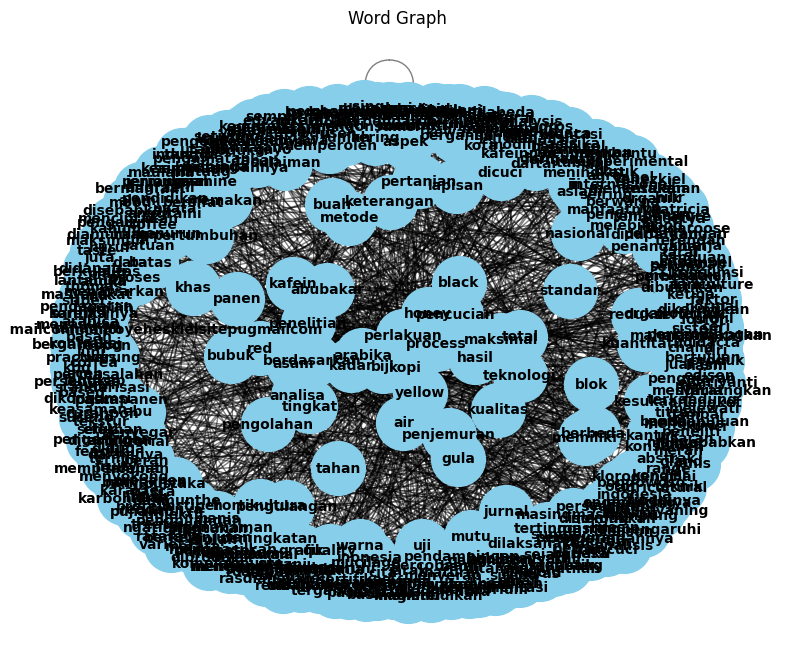

In [1]:
import fitz  # PyMuPDF
import nltk
import networkx as nx
import matplotlib.pyplot as plt
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
import pymupdf4llm
import pandas as pd # Import pandas for matrix display
import numpy as np # Import numpy

# --- Konfigurasi Awal ---
# Mengunduh resource NLTK yang diperlukan
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

def main():
    pdf_path = "830-836.pdf"

    # ==========================================
    # TAHAP 1: Ekstrak Text dari PDF
    # ==========================================
    print(f"--- 1. Mengekstrak teks dari {pdf_path} ---")
    text_content = extract_text_from_pdf(pdf_path)
    print(f"Berhasil mengekstrak {len(text_content)} karakter.")

    # ==========================================
    # TAHAP 2: Ekstrak Kalimat menggunakan NLTK
    # ==========================================
    print("\n--- 2. Mengekstrak kalimat & Preprocessing ---")
    sentences = sent_tokenize(text_content)
    print(f"Ditemukan {len(sentences)} kalimat mentah.")

    # Tambahan: Menampilkan beberapa kalimat asli
    print("\nContoh 5 Kalimat Asli:")
    for i, sentence in enumerate(sentences[:5]):
        print(f"  {i+1}. {sentence.strip()}")

    # Preprocessing (Membersihkan teks untuk hasil graph yang lebih baik)
    # Kita menghapus stopwords (kata umum seperti 'dan', 'yang', 'the')
    clean_sentences_tokens = preprocess_text(sentences)
    print(f"Ditemukan {len(clean_sentences_tokens)} kalimat setelah preprocessing.")

    # Tambahan: Menampilkan beberapa kalimat hasil tokenisasi
    print("\nContoh 5 Kalimat Hasil Tokenisasi (setelah Preprocessing):")
    for i, tokens in enumerate(clean_sentences_tokens[:5]):
        print(f"  {i+1}. {' '.join(tokens)}")

    # ==========================================
    # TAHAP 3: Membuat Graph menggunakan Co-occurrence Matrix
    # ==========================================
    print("\n--- 3. Membangun Word Graph (Co-occurrence) ---")
    # Menggunakan Window Size = 2
    window_size = 2
    G = build_co_occurrence_graph(clean_sentences_tokens, window_size)
    print(f"Graph terbentuk dengan {G.number_of_nodes()} node (kata) dan {G.number_of_edges()} edge (hubungan).")

    print("\nContoh 10 Pasangan Kata Co-occurrence Teratas:")
    # Mengurutkan edge berdasarkan weight (co-occurrence count) secara menurun
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
    for i, (u, v, data) in enumerate(sorted_edges[:10]):
        print(f"  {i+1}. ('{u}', '{v}'): {data['weight']} kali")

    # ==========================================
    # TAHAP 4: Analisa PageRank
    # ==========================================
    print("\n--- 4. Menghitung PageRank ---")
    pagerank_scores = nx.pagerank(G, weight='weight')

    # Mengurutkan kata berdasarkan skor tertinggi
    sorted_ranking = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

    print("\nTop 10 Kata Kunci (Berdasarkan PageRank):")
    for i, (word, score) in enumerate(sorted_ranking[:10], 1):
        print(f"{i}. {word}: {score:.4f}")

    # ==========================================
    # MENAMPILKAN CO-OCCURRENCE MATRIX
    # ==========================================
    print("\n--- Full Co-occurrence Matrix ---")
    all_words_for_matrix = list(G.nodes())
    co_occurrence_matrix = pd.DataFrame(0, index=all_words_for_matrix, columns=all_words_for_matrix, dtype=int)

    for u, v, data in G.edges(data=True):
        co_occurrence_matrix.loc[u, v] = data['weight']
        co_occurrence_matrix.loc[v, u] = data['weight'] # Matriks simetris
    display(co_occurrence_matrix)


    # ==========================================
    # VISUALISASI (Opsional untuk melihat Graph)
    # ==========================================
    visualize_graph(G, sorted_ranking) # Visualisasi 20 kata teratas saja agar tidak rumit

# --- Fungsi Pendukung ---

def extract_text_from_pdf(filepath):
    """
    Ekstrak teks mentah dari PDF menggunakan PyMuPDF (fitz).
    Diperbarui untuk menggunakan pymupdf4llm.to_markdown().
    """
    doc = fitz.open(filepath)
    text = pymupdf4llm.to_markdown(doc)
    doc.close()
    return text

def preprocess_text(sentences):
    """
    Membersihkan kalimat: lowercase, hapus tanda baca, hapus stopwords.
    """
    cleaned_tokens_list = []

    # Gabungan stopword Indonesia dan Inggris karena dokumen bilingual
    stop_words = set(stopwords.words('indonesian') + stopwords.words('english'))

    for sentence in sentences:
        # Hapus karakter non-huruf dan ubah ke huruf kecil
        sentence = re.sub(r'[^a-zA-Z\s]', '', sentence).lower()
        tokens = word_tokenize(sentence)

        # Filter stopwords dan kata pendek
        filtered_tokens = [w for w in tokens if w not in stop_words and len(w) > 2]

        if filtered_tokens:
            cleaned_tokens_list.append(filtered_tokens)

    return cleaned_tokens_list

def build_co_occurrence_graph(tokens_list, window_size=2):
    """
    Membangun Graph dari co-occurrence matrix.
    Node = Kata, Edge = Kemunculan bersama dalam window size.
    """
    d = defaultdict(int)
    vocab = set()

    for tokens in tokens_list:
        for i in range(len(tokens)):
            token = tokens[i]
            vocab.add(token)

            for j in range(1, window_size + 1):
                if i + j < len(tokens):
                    next_token = tokens[i + j]
                    # Urutkan pasangan agar (A, B) sama dengan (B, A) (Undirected Graph)
                    pair = tuple(sorted((token, next_token)))
                    d[pair] += 1

    # Buat Graph menggunakan NetworkX
    G = nx.Graph()
    for (w1, w2), count in d.items():
        G.add_edge(w1, w2, weight=count)

    return G

def visualize_graph(G, top_nodes_data):
    """
    Visualisasi subgraph dari kata-kata terpenting.
    Sesuai gambar Word Graph di PPT .
    """
    top_words = [w for w, s in top_nodes_data]
    subgraph = G.subgraph(top_words)

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(subgraph, k=1.5)  # Layout graph

    nx.draw_networkx_nodes(subgraph, pos, node_size=1500, node_color='skyblue')
    nx.draw_networkx_edges(subgraph, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(subgraph, pos, font_size=10, font_weight='bold')

    plt.title("Word Graph")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()